# Import datasets

In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

# Training set_log(min)

In [2]:
df1=pd.read_csv("dataset/log_mini.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df1.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


# Training set_tf(min)

In [5]:
df1.shape

(167880, 21)

In [6]:
len(df1.track_id_clean.unique())

50704

In [7]:
df2=pd.read_csv("dataset/tf_mini.csv")

In [8]:
df2.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [9]:
df2.shape

(50704, 30)

In [10]:
len(df2.track_id.unique())

50704

# Check null values

In [11]:
df1.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [12]:
df2.isnull().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

# Merge datasets

In [13]:
df3 = pd.merge(df1, df2, left_on='track_id_clean', right_on='track_id')

In [14]:
df3.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,1,1,0,0,False,17,2018-07-15,True,editorial_playlist,fwdbtn,endplay,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,1,1,0,0,False,21,2018-07-14,True,user_collection,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,0,0,0,0,False,18,2018-07-15,True,editorial_playlist,fwdbtn,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,1,1,0,0,True,19,2018-07-14,False,editorial_playlist,trackdone,fwdbtn,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [15]:
df3.shape

(167880, 51)

In [16]:
len(df3.track_id_clean.unique())

50704

In [17]:
len(df3.track_id.unique())

50704

In [18]:
df3=df3.drop(["track_id_clean"],axis='columns')

In [19]:
df3.shape

(167880, 50)

In [20]:
df3.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,False,False,True,False,0,0,1,1,0,0,False,17,2018-07-15,True,editorial_playlist,fwdbtn,endplay,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,False,False,False,True,0,0,1,1,0,0,False,21,2018-07-14,True,user_collection,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,False,False,False,True,0,1,0,0,0,0,False,18,2018-07-15,True,editorial_playlist,fwdbtn,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,False,False,True,False,0,0,1,1,0,0,True,19,2018-07-14,False,editorial_playlist,trackdone,fwdbtn,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [21]:
df3.describe(include='all')

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,167880,167880.000000,167880.000000,167880,167880,167880,167880,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880,167880.000000,167880,167880,167880,167880,167880,167880,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,1.678800e+05,167880.000000,167880.000000,167880.000000,167880.000000,167880,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
unique,10000,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,18,2,6,9,7,50704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0_0e25cf14-36ea-4f02-b4e5-d6cf9f3f37ce,NaN,NaN,False,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2018-07-15,True,user_collection,fwdbtn,fwdbtn,t_bacf06d3-9185-4183-84ea-ff0db51475ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,97118,86824,108850,111996,NaN,NaN,NaN,NaN,NaN,NaN,116050,NaN,119639,136053,67430,79912,81389,1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.325911,17.651823,NaN,NaN,NaN,NaN,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,NaN,14.193084,NaN,NaN,NaN,NaN,NaN,NaN,215.893484,2013.368614,99.744583,0.217969,0.547847,0.580170,0.668978,9.098028,0.626536,1.008124,3.174287e-02,5.202692,0.189810,-7.049820,0.596501,NaN,0.348247,0.142189,122.674906,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859
std,NaN,5.457638,3.422025,NaN,NaN,NaN,NaN,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,NaN,5.996243,NaN,NaN,NaN,NaN,NaN,NaN,60.223626,9.740043,0.892779,0.246097,0.158555,0.179003,0.159486,2.540397,0.181731,0.038892,1.427120e-01,3.681829,0.150867,3.164024,0.207718,NaN,0.188667,0.133225,29.821581,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958
min,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,NaN,5.000000,15.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,183.503403,2015.000000,99.913831,0.030579,0.434064,0.451872,0.562350,7.224558,0.513711,0.989104,3.701751e-09,1.000000,0.099943,-8.232000,0.452991,NaN,0.205129,0.044635,97.004997,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752
50%,NaN,9.000000,20.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,212.027023,2017.000000,99.988785,0.115362,0.550788,0.594088,0.687427,8.965730,0.630788,1.013991,5.221813e-07,5.000000,0.125049,-6.506000,0.639286,NaN,0.305746,0.08

# Data Visualization

In [22]:
#Custome Color Palette
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [23]:
data = df3.copy()
pos_tempo = data[data['skip_2'] == 1]['tempo']
neg_tempo = data[data['skip_2'] == 0]['tempo']
pos_dance = data[data['skip_2'] == 1]['danceability']
neg_dance = data[data['skip_2'] == 0]['danceability']
pos_duration = data[data['skip_2'] == 1]['duration']
neg_duration = data[data['skip_2'] == 0]['duration']
pos_loudness = data[data['skip_2'] == 1]['loudness']
neg_loudness = data[data['skip_2'] == 0]['loudness']
pos_speechiness = data[data['skip_2'] == 1]['speechiness']
neg_speechiness = data[data['skip_2'] == 0]['speechiness']
pos_valence = data[data['skip_2'] == 1]['valence']
neg_valence = data[data['skip_2'] == 0]['valence']
pos_energy = data[data['skip_2'] == 1]['energy']
neg_energy = data[data['skip_2'] == 0]['energy']
pos_acousticness = data[data['skip_2'] == 1]['acousticness']
neg_acousticness = data[data['skip_2'] == 0]['acousticness']
pos_key = data[data['skip_2'] == 1]['key']
neg_key = data[data['skip_2'] == 0]['key']
pos_instrumentalness = data[data['skip_2'] == 1]['instrumentalness']
neg_instrumentalness = data[data['skip_2'] == 0]['instrumentalness']


# Predict target using trained classifiers

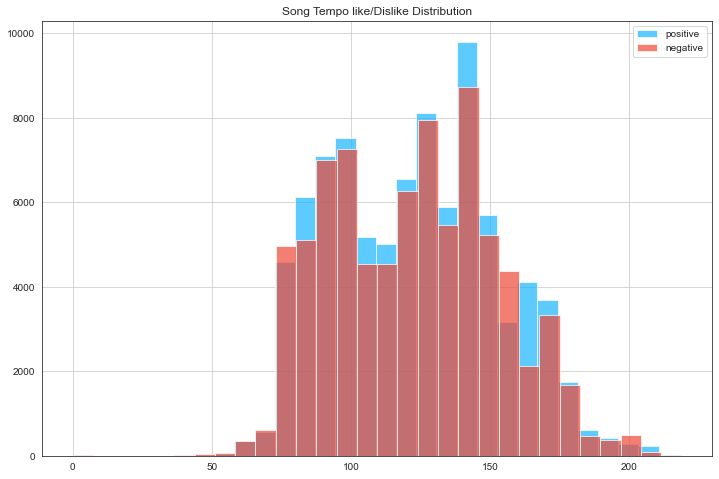

In [24]:
fig = plt.figure(figsize=(12, 8))
plt.title("Song Tempo like/Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc = "upper right")

<ipython-input-25-b72141027615>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(331)
<ipython-input-25-b72141027615>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax6 = fig2.add_subplot(332)
<ipython-input-25-b72141027615>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

<AxesSubplot:title={'center':'Song Instrumentalness Like Distribution'}, xlabel='Instrumentalness', ylabel='Count'>

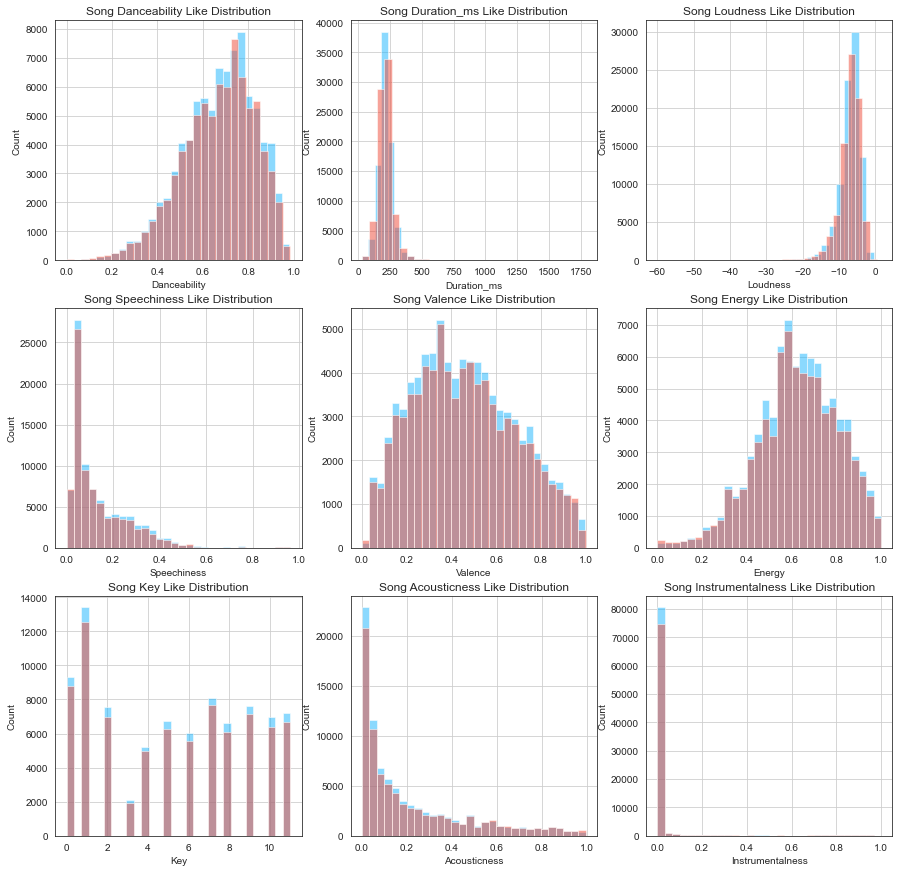

In [25]:
fig2 = plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
pos_dance.hist(alpha=0.5, bins=30)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')

ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)


#Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration_ms')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration_ms Like Distribution')

ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

#Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

#Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)


#Valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')

ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)


#Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)


#Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')

ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)


#Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title('Song Acousticness Like Distribution')

ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)


#Instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title('Song Instrumentalness Like Distribution')

ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)



# Encoding categorial features

In [26]:
df3['mode'] = df3['mode'].replace({
    'major': 1,
    'minor': 0
})
df3['skip_1'] = df3['skip_1'].replace({
    True: 1,
    False: 0
})
df3['skip_2'] = df3['skip_2'].replace({
    True: 1,
    False: 0
})
df3['skip_3'] = df3['skip_3'].replace({
    True: 1,
    False: 0
})
df3['not_skipped'] = df3['not_skipped'].replace({
    True: 1,
    False: 0
})
df3['hist_user_behavior_is_shuffle'] = df3['hist_user_behavior_is_shuffle'].replace({
    True: 1,
    False: 0
})
df3['premium'] = df3['premium'].replace({
    True: 1,
    False: 0
})

In [27]:
df3 = pd.get_dummies(df3, columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'])

In [28]:
df3.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,1,0,0,0,0,0,0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,0,0,1,0,0,0,1,1,0,0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,0,0,0,1,0,0,1,1,0,0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,0,0,0,1,0,1,0,0,0,0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,0,0,1,0,0,0,1,1,0,0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [29]:
df3.shape

(167880, 69)

In [30]:
df3.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personal

In [31]:
#scaling_col = ["hist_user_behavior_n_seekfwd","hist_user_behavior_n_seekback","duration","us_popularity_estimate","dyn_range_mean","flatness","instrumentalness","key","loudness","tempo","time_signature","acoustic_vector_0","acoustic_vector_1","acoustic_vector_2","acoustic_vector_3","acoustic_vector_4","acoustic_vector_5","acoustic_vector_6","acoustic_vector_7"]

In [32]:
df4 = df3.copy()

# Orutliers

In [33]:
max_threshold = df4['hist_user_behavior_n_seekfwd'].quantile(0.999)
max_threshold

3.0

In [34]:
max_threshold_seekback = df4['hist_user_behavior_n_seekback'].quantile(0.999)
max_threshold_seekback

4.0

In [35]:
min_thresold_loudness = df4['loudness'].quantile(0.001)
min_thresold_loudness

-31.202999114990234

In [36]:
max_thresold_loudness = df4['loudness'].quantile(0.9998)
max_thresold_loudness

0.1749999970197677

In [37]:
df4 = df4[df4['hist_user_behavior_n_seekfwd'] < max_threshold]
df4 = df4[df4['hist_user_behavior_n_seekback'] < max_threshold_seekback]
df4 =  df4[(df4['loudness'] < 0) & (df4['loudness'] > min_thresold_loudness)]

# Normalization

In [38]:
df5 = df4.copy()
df5.drop(['session_id','track_id','date','skip_1','skip_3', 'not_skipped'],axis = 'columns', inplace = True)

In [39]:
df5.head()

,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,1,20,0,0,0,0,0,0,0,1,16,1,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,7,12,0,0,0,1,1,0,0,0,17,1,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,6,20,0,0,0,1,1,0,0,0,21,1,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,9,13,0,0,1,0,0,0,0,0,18,1,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,7,12,0,0,0,1,1,0,0,1,19,0,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [40]:
sc = MinMaxScaler()

In [41]:
scaling_col = df5.columns

In [42]:
for i in scaling_col:
    df5[i] = sc.fit_transform(df5[[i]])

In [43]:
df5.head()

,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.695652,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.315789,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.739130,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.263158,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.913043,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.421053,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.782609,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.315789,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.826087,0.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Correlation HeatMap

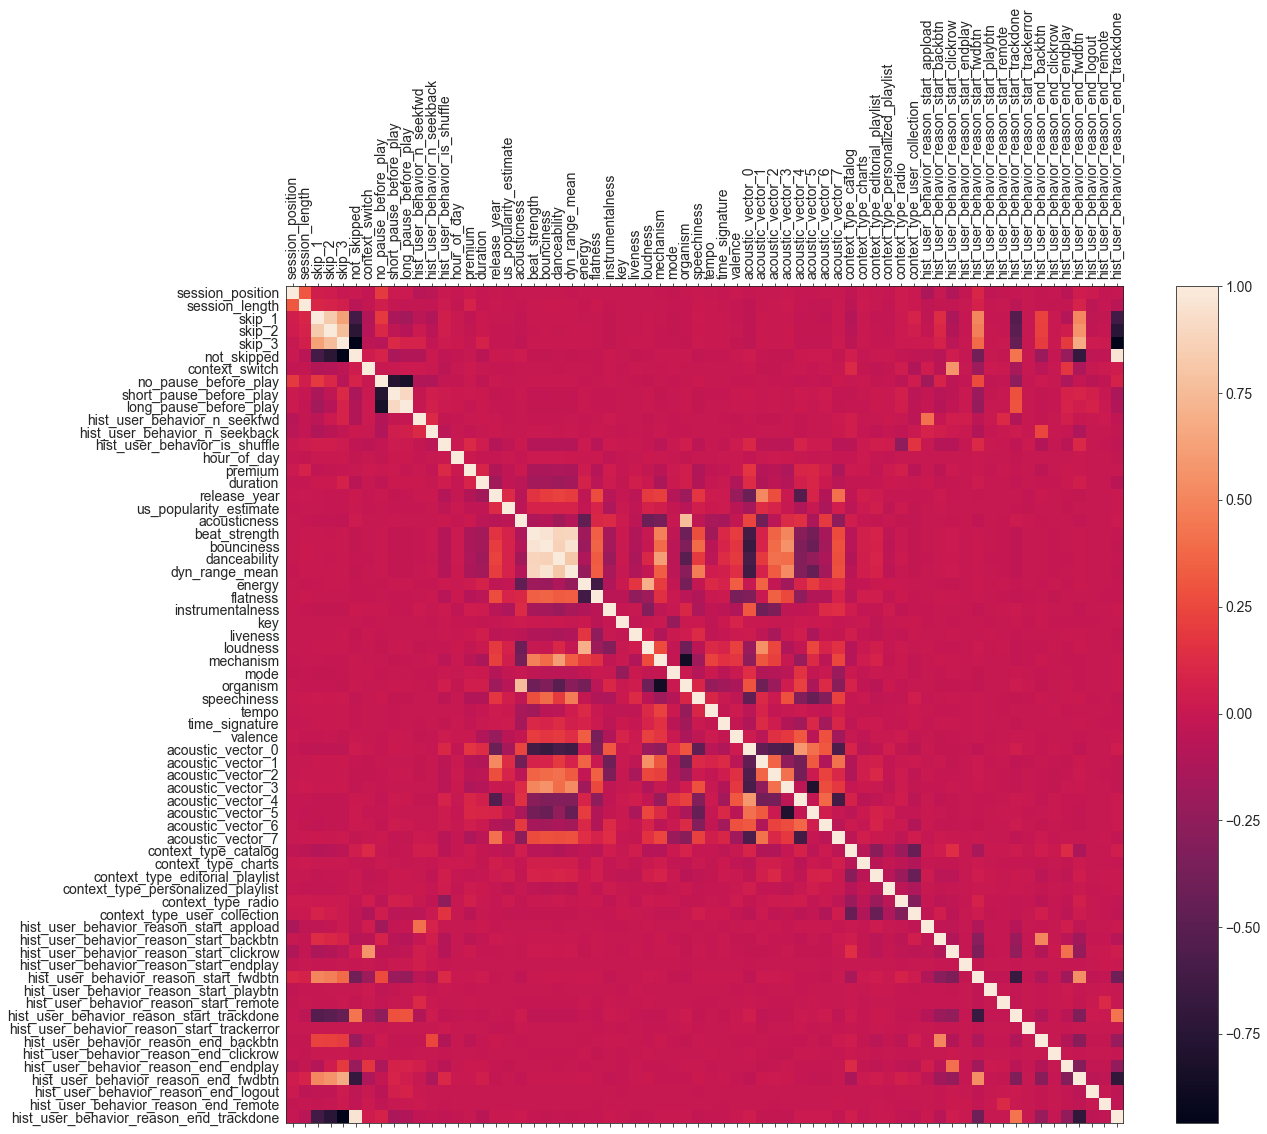

In [44]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df4.corr(), fignum=f.number)
plt.xticks(range(df4.select_dtypes(['number']).shape[1]), df4.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df4.select_dtypes(['number']).shape[1]), df4.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# PCA

In [45]:
df6 = df5.copy()

In [46]:
df6.shape

(167128, 63)

In [47]:
df6.head()

,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.695652,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.315789,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.739130,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.263158,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.913043,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.421053,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.782609,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.315789,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.826087,0.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
df6_x = df6.drop(['skip_2'],axis = "columns") 

In [49]:
df6_y = df6.skip_2

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=35, random_state= 60)
pca.fit(df6_x)

PCA(n_components=35, random_state=60)

In [52]:
x_pca = pca.transform(df6_x)

In [53]:
variance= pca.explained_variance_ratio_

<BarContainer object of 35 artists>

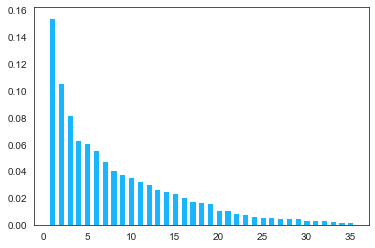

In [54]:
plt.bar(x= range(1, len(variance)+1), height=variance, width=0.7)

In [55]:
pca = PCA(n_components=38)
pca.fit(df6_x)
df6_pca = pca.transform(df6_x)

In [56]:
df6_pca.shape

(167128, 38)

# GBT

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, df6_y, test_size=0.2, random_state=40)

In [59]:
!pip install lightgbm
import lightgbm as lgb
from datetime import datetime 
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [60]:
d_train = lgb.Dataset(x_train, label=y_train)

In [61]:
lgbm_params = {'learning_rate':0.01, 'boosting_type':'dart',    #Try dart for better accuracy
              'objective':'binary',
              'metric':['auc', 'binary_logloss'],
              'num_leaves':100,
              'max_depth':50}

In [62]:
start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates
stop=datetime.now()

[LightGBM] [Info] Number of positive: 69154, number of negative: 64548
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 133702, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517225 -> initscore=0.068927
[LightGBM] [Info] Start training from score 0.068927


In [63]:
execution_time_lgbm = stop-start
print("LGBM execution time is: ", execution_time_lgbm)

LGBM execution time is:  0:00:06.519339


In [64]:
y_pred_lgbm=clf.predict(x_test)

In [65]:
for i in range(0, x_test.shape[0]):
    if y_pred_lgbm[i]>=.5:       # setting threshold to .5
       y_pred_lgbm[i]=1
    else:  
       y_pred_lgbm[i]=0

In [66]:
print ("Accuracy with LGBM = ", metrics.accuracy_score(y_pred_lgbm,y_test))

Accuracy with LGBM =  0.8782384969784001


<AxesSubplot:>

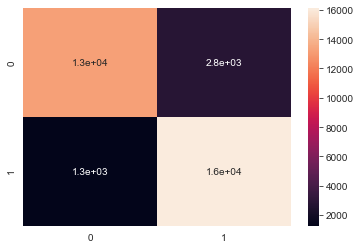

In [67]:
from sklearn.metrics import confusion_matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True)

In [68]:
print("AUC score with LGBM is: ", roc_auc_score(y_pred_lgbm,y_test))

AUC score with LGBM is:  0.8821855107094754


# SVM

In [69]:
df3.shape

(167880, 69)

In [70]:
from sklearn.preprocessing import MinMaxScaler
import sklearn
sc = MinMaxScaler()
scaling_col = df3.columns
for i in scaling_col:
    df3[i] = sc.fit_transform(df3[[i]])


ValueError: could not convert string to float: '0_00006f66-33e5-4de7-a324-2d18e439fc1e'

In [ ]:
df3.head()

In [ ]:
x =df3.drop(['skip_2'],axis = 'columns')

In [ ]:
y = df3.skip_2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")